******************************
context imported. Front of path:
C:\Users\vicen\repos_511\numeric_2024
back of path: C:\Users\vicen\anaconda3\Lib\site-packages\Pythonwin
******************************

through C:\Users\vicen\repos_511\numeric_2024\numlabs\lab4\example\context.py


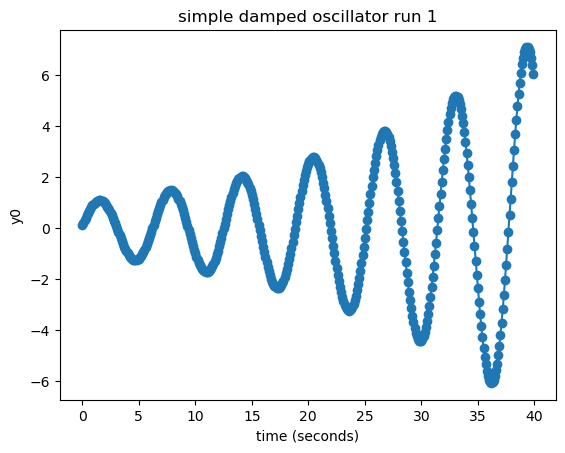

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import context
import json
from numlabs.lab4.example.init_conditions import get_init


def derivs4(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

def euler4(coeff,y,derivs):
  ynew=y + coeff.dt*derivs(coeff,y)
  return ynew


def midpoint4(coeff, y, derivs):
  ynew = y + coeff.dt*derivs(coeff,y + (0.5 * coeff.dt * derivs(coeff,y)))
  return ynew

def rk4ODE(coeff, y, derivs):
  k1 = coeff.dt * derivs(coeff,y)
  k2 = coeff.dt * derivs(coeff,y + (0.5 * k1))
  k3 = coeff.dt * derivs(coeff,y + (0.5 * k2))
  k4 = coeff.dt * derivs(coeff,y +  k3)
  ynew = y + (1.0/6.0) * (k1 + (2.0 * k2) + (2.0 * k3) + k4)
  return ynew

if __name__ == "__main__":

  coeff=get_init()
  time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
  y=coeff.yinitial
  nsteps=len(time)
  savedata=np.empty([nsteps],'float')
  for i in range(nsteps):
    y=euler4(coeff,y,derivs4)
    savedata[i]=y[0]

  plt.close('all')
  theFig,theAx=plt.subplots(1,1)
  theAx.plot(time,savedata,'o-')
  theAx.set_title(coeff.plot_title)
  theAx.set_xlabel('time (seconds)')
  theAx.set_ylabel('y0')

  plt.show()
